In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# globals
vref = 1
bioz_gain = 10
i_mag = 45.249e-6
two_over_pi=2/np.pi


i_coef_131k = 1.0055 # 131.072 kHz
q_coef_131k = 1.0097 # 131.072 kHz
i_phase_coef_131k = 0.432 # 131.072 kHz
q_phase_coef_131k = 0.648 # 131.072 kHz
i_offset_count_131k = -507.7 # 131.072 kHz
q_offset_count_131k = -137.3 # 131.072 kHz

In [14]:
i_coef_4k = .9 # 4.096 kHz
q_coef_4k = .9016 # 4.096 kHz
i_phase_coef_4k = -22.458 # 4.096 kHz
q_phase_coef_4k = -22.57 # 4.096 kHz
i_offset_count_4k = -488.7 # 4.096 kHz
q_offset_count_4k = -258.5 # 4.096 kHz

In [15]:
df = pd.read_csv("logs_32620-system/logs/MAX30009_20251021_172308.bioz.csv", usecols=["BIOZI", "BIOZQ"])

df

,BIOZI,BIOZQ
0,5342.0,-3901.0
1,5364.0,-3872.0
2,5379.0,-3843.0
3,5376.0,-3848.0
4,5375.0,-3854.0
...,...,...
657,5378.0,-3851.0
658,5376.0,-3855.0
659,5375.0,-3856.0
660,5376.0,-3855.0


In [16]:
df["I_nocalib"]=df["BIOZI"].apply(lambda i: (i * vref)/(pow(2, 19)*bioz_gain*two_over_pi*i_mag))
# df["I_nocalib"]=df["I_nocalib"].apply(lambda i: i/i_mag)

df["Q_nocalib"]=df["BIOZQ"].apply(lambda q: (q * vref)/(pow(2, 19)*bioz_gain*two_over_pi*i_mag))

df

,BIOZI,BIOZQ,I_nocalib,Q_nocalib
0,5342.0,-3901.0,35.370798,-25.829555
1,5364.0,-3872.0,35.516466,-25.637538
2,5379.0,-3843.0,35.615785,-25.445522
3,5376.0,-3848.0,35.595921,-25.478628
4,5375.0,-3854.0,35.589300,-25.518356
...,...,...,...,...
657,5378.0,-3851.0,35.609163,-25.498492
658,5376.0,-3855.0,35.595921,-25.524977
659,5375.0,-3856.0,35.589300,-25.531598
660,5376.0,-3855.0,35.595921,-25.524977


### Applying calibration

In [17]:
# subtract offests from load impedances
df["i_load_offset"]=df["BIOZI"].apply(lambda biozi: biozi - i_offset_count)
df["q_load_offset"]=df["BIOZQ"].apply(lambda biozi: biozi - q_offset_count)

# apply i and q coefs, correcting magnitude/phase delay
df["i_cal_real"]=df["i_load_offset"].apply(lambda i_load_offset: (i_load_offset/i_coef)*np.cos(i_phase_coef*np.pi/180))
df["i_cal_imag"]=df["i_load_offset"].apply(lambda i_load_offset: (i_load_offset/i_coef)*np.sin(i_phase_coef*np.pi/180))

df["q_cal_real"]=df["q_load_offset"].apply(lambda q_load_offset: (q_load_offset/q_coef)*np.sin(q_phase_coef*np.pi/180))
df["q_cal_imag"]=df["q_load_offset"].apply(lambda q_load_offset: (q_load_offset/q_coef)*np.cos(q_phase_coef*np.pi/180))

# calculate load impedance
df["load_real"]=df["i_cal_real"]-df["q_cal_real"]
df["load_imag"]=df["i_cal_imag"]+df["q_cal_imag"]

df

NameError: name 'i_offset_count' is not defined

### Converting counts to BioZ

In [ ]:
# convert from counts to BioZ
two_over_pi=2/np.pi

df["I"]=df["load_real"].apply(lambda i: (i * vref)/(pow(2, 19)*bioz_gain*two_over_pi*i_mag))
df["Q"]=df["load_imag"].apply(lambda q: (q * vref)/(pow(2, 19)*bioz_gain*two_over_pi*i_mag))

df

,BIOZI,BIOZQ,I_nocalib,Q_nocalib,i_load_offset,q_load_offset,i_cal_real,i_cal_imag,q_cal_real,q_cal_imag,load_real,load_imag,I,Q
0,3327.0,-306.0,22.028949,-2.026107,3815.7,-47.5,3507.027918,-1449.647578,18.055922,-43.440663,3488.971996,-1493.088241,23.101408,-9.886133
1,3219.0,-441.0,21.313852,-2.919978,3707.7,-182.5,3407.764607,-1408.616591,69.372752,-166.903599,3338.391855,-1575.520189,22.104377,-10.431937
2,3242.0,-413.0,21.466141,-2.734582,3730.7,-154.5,3428.904016,-1417.354671,58.729261,-141.296471,3370.174754,-1558.651142,22.314820,-10.320242
3,3261.0,-390.0,21.591945,-2.582293,3749.7,-131.5,3446.367006,-1424.573086,49.986394,-120.262045,3396.380612,-1544.835131,22.488336,-10.228763
4,3257.0,-393.0,21.565460,-2.602157,3745.7,-134.5,3442.690587,-1423.053420,51.126768,-123.005666,3391.563819,-1546.059085,22.456443,-10.236867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,3253.0,-399.0,21.538975,-2.641885,3741.7,-140.5,3439.014168,-1421.533753,53.407516,-128.492907,3385.606652,-1550.026661,22.416999,-10.263137
533,3254.0,-399.0,21.545597,-2.641885,3742.7,-140.5,3439.933272,-1421.913670,53.407516,-128.492907,3386.525756,-1550.406577,22.423085,-10.265653
534,3254.0,-399.0,21.545597,-2.641885,3742.7,-140.5,3439.933272,-1421.913670,53.407516,-128.492907,3386.525756,-1550.406577,22.423085,-10.265653
535,3255.0,-399.0,21.552218,-2.641885,3743.7,-140.5,3440.852377,-1422.293586,53.407516,-128.492907,3387.444861,-1550.786494,22.429170,-10.268168


In [ ]:
print("I: ", df["I"].mean())
print("Q: ", df["Q"].mean())

I:  22.426962959886644
Q:  -10.2553636269662


In [ ]:
import csv
from datetime import datetime as date

df.to_csv(f"logs_32620-system/logs_calibrated/MAX30009_Samples_{date.now()}.csv", columns=["I", "Q"])

### 4.1 kHz

In [ ]:
headers = ["I", "Q"]
df = pd.read_csv("logs_32620-system/logs_calibrated/MAX30009_Samples_2025-10-21 17:33:43.166697.csv", usecols=["I", "Q"])

df

,I,Q
0,29.375940,-41.088037
1,29.607260,-40.953204
2,29.790986,-40.798698
3,29.756496,-40.824174
4,29.732785,-40.862052
...,...,...
657,29.761638,-40.850139
658,29.736765,-40.871644
659,29.727148,-40.875615
660,29.736765,-40.871644


             I          Q
0    29.375940 -41.088037
1    29.607260 -40.953204
2    29.790986 -40.798698
3    29.756496 -40.824174
4    29.732785 -40.862052
..         ...        ...
657  29.761638 -40.850139
658  29.736765 -40.871644
659  29.727148 -40.875615
660  29.736765 -40.871644
661  29.753182 -40.870483

[662 rows x 2 columns]


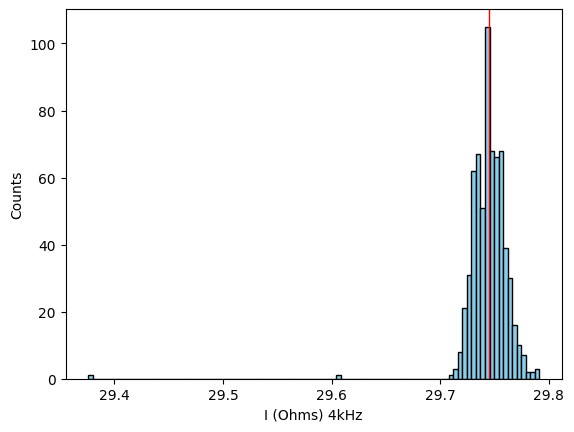

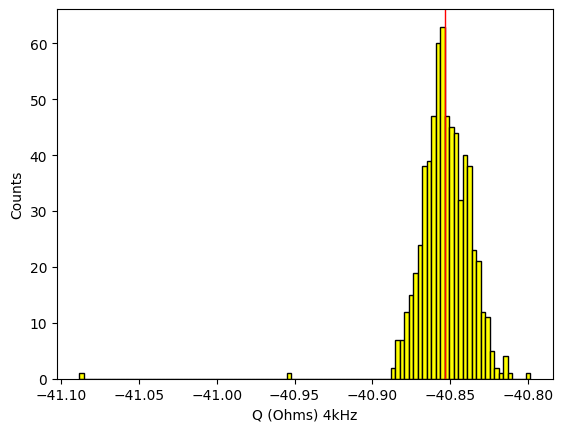

In [ ]:
i_mean = df["I"].mean()
i_hist = plt.hist(df["I"], bins=100, color="skyblue", edgecolor="black")
plt.xlabel("I (Ohms) 4kHz")
plt.ylabel("Counts")

plt.axvline(i_mean, color="red", linewidth="1")

plt.show(i_hist)

q_mean = df["Q"].mean()
q_hist = plt.hist(df["Q"], bins=100, color="yellow", edgecolor="black")
plt.xlabel("Q (Ohms) 4kHz")
plt.ylabel("Counts")

plt.axvline(q_mean, color="red", linewidth="1")

plt.show(q_hist)

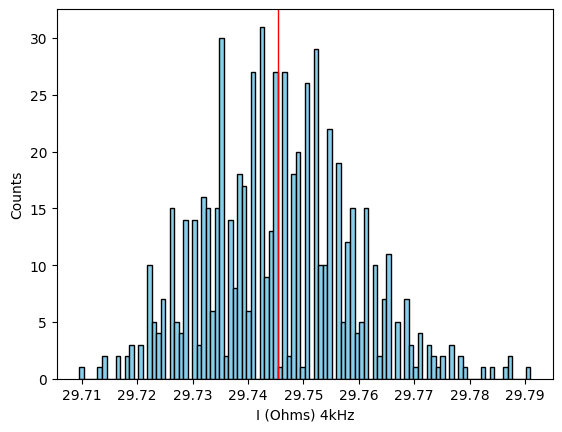

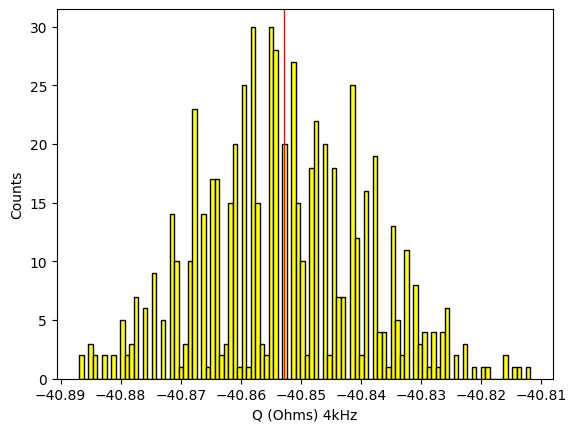

np.float64(0.013854545516798615)

In [ ]:
i = df["I"]
i_filtered = i[(i >= 29.7) & (i <= 29.8)]


i_filtered_mean = i_filtered.mean()
i_filtered_hist = plt.hist(i_filtered, bins=100, color="skyblue",edgecolor="black")
plt.xlabel("I (Ohms) 4kHz")
plt.ylabel("Counts")

plt.axvline(i_filtered_mean, color="red", linewidth="1")

plt.show(i_filtered_hist)

q = df["Q"]
q_filtered = q[(q >= -40.9) & (q <= -40.8)]


q_filtered_mean = q_filtered.mean()
q_filtered_hist = plt.hist(q_filtered, bins=100, color="yellow",edgecolor="black")
plt.xlabel("Q (Ohms) 4kHz")
plt.ylabel("Counts")

plt.axvline(q_filtered_mean, color="red", linewidth="1")

plt.show(q_filtered_hist)

q_filtered.std()

### 131 kHz

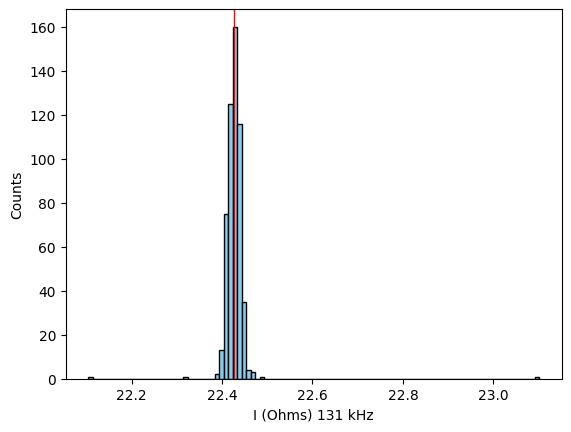

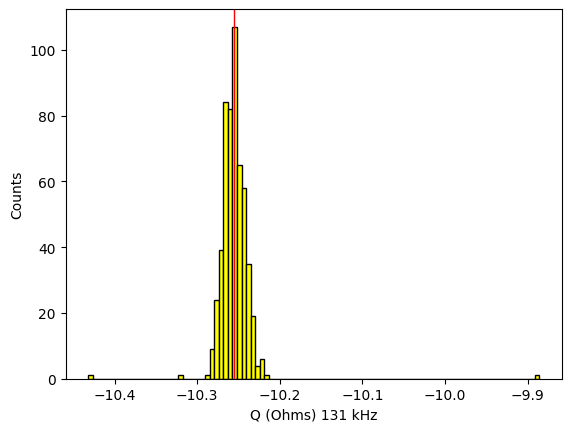

In [ ]:
df_131 = pd.read_csv("logs_32620-system/logs_calibrated/MAX30009_Samples_2025-10-21 18:29:06.033133.csv", usecols=["I", "Q"])

df_131

i_mean_131 = df_131["I"].mean()
i_hist_131 = plt.hist(df_131["I"], bins=100, color="skyblue", edgecolor="black")
plt.xlabel("I (Ohms) 131 kHz")
plt.ylabel("Counts")

plt.axvline(i_mean_131, color="red", linewidth="1")

plt.show(i_hist_131)

q_mean_131 = df_131["Q"].mean()
q_hist_131 = plt.hist(df_131["Q"], bins=100, color="yellow", edgecolor="black")
plt.xlabel("Q (Ohms) 131 kHz")
plt.ylabel("Counts")

plt.axvline(q_mean_131, color="red", linewidth="1")

plt.show(q_hist_131)

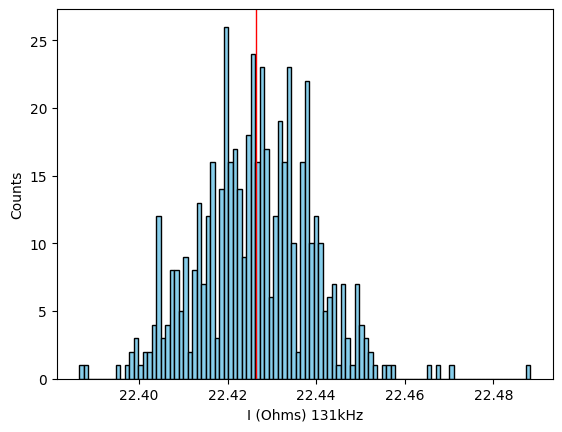

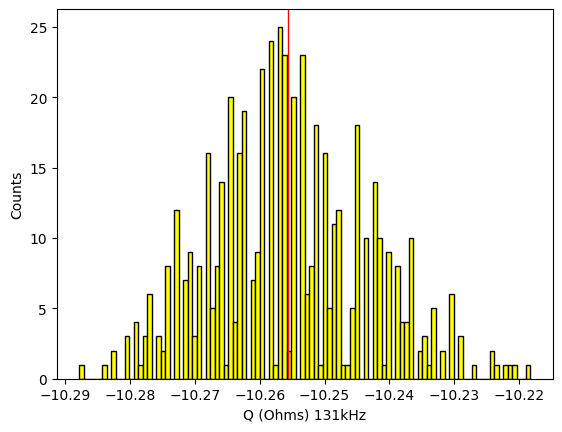

In [ ]:
i_131 = df_131["I"]
i_filtered_131 = i_131[(i_131 >= 22.375) & (i_131 <= 22.6)]


i_filtered_mean_131 = i_filtered_131.mean()
i_filtered_hist_131 = plt.hist(i_filtered_131, bins=100, color="skyblue",edgecolor="black")
plt.xlabel("I (Ohms) 131kHz")
plt.ylabel("Counts")

plt.axvline(i_filtered_mean_131, color="red", linewidth="1")

plt.show(i_filtered_hist_131)

q_131 = df_131["Q"]
q_filtered_131 = q_131[(q_131 >= -10.3) & (q_131 <= -10.2)]


q_filtered_mean_131 = q_filtered_131.mean()
q_filtered_hist_131 = plt.hist(q_filtered_131, bins=100, color="yellow",edgecolor="black")
plt.xlabel("Q (Ohms) 131kHz")
plt.ylabel("Counts")

plt.axvline(q_filtered_mean_131, color="red", linewidth="1")



In [ ]:
df_131.to_csv("df_131.csv", index=False)
df.to_csv("df_4.csv", index=False) # 4k

print(f"131k Z_real: {df_131["I"].mean()}")
print(f"131k Z_imag: {df_131["Q"].mean()}")
print(f"4k Z_real: {df["I"].mean()}")
print(f"4k Z_imag: {df_131["Q"].mean()}")

131k Z_real: 22.426962959886644
131k Z_imag: -10.2553636269662
4k Z_real: 29.744624533129
4k Z_imag: -10.2553636269662
